{(0, 0): (0, 0), (0, 1): (0, 1), (0, 2): (0, 2), (0, 3): (0, 3), (0, 4): (0, 4), (1, 0): (1, 0), (1, 1): (1, 1), (1, 2): (1, 2), (1, 3): (1, 3), (1, 4): (1, 4), (2, 0): (2, 0), (2, 1): (2, 1), (2, 2): (2, 2), (2, 3): (2, 3), (2, 4): (2, 4), (3, 0): (3, 0), (3, 1): (3, 1), (3, 2): (3, 2), (3, 3): (3, 3), (3, 4): (3, 4), (4, 0): (4, 0), (4, 1): (4, 1), (4, 2): (4, 2), (4, 3): (4, 3), (4, 4): (4, 4)}


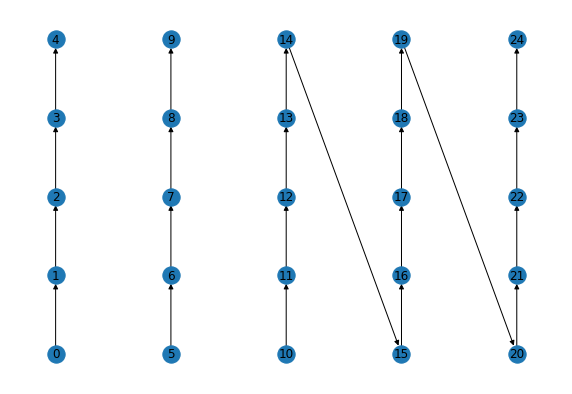

In [39]:
nodes=[ 
        (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), 
        (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), 
        (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), 
        (3, 0), (3, 1), (3, 2), (3, 3), (3, 4),
        (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)
    ]

edges=[
        ((0, 0), (0, 1),{'w': -7}), #1,0 freccia al contrario
        ((0, 1), (0, 2),{'w': 1}),
        ((0, 2), (0, 3),{'w': 2}),
        ((0, 3), (0, 4),{'w': -5}),
        ((1, 0), (1, 1),{'w': 9}),
        ((1, 1), (1, 2),{'w': 3}),
        ((1, 2), (1, 3),{'w': 7}),
        ((1, 3), (1, 4),{'w': 5}),
        #((1, 4), (2, 0),{'w': -1}),
        ((2, 0), (2, 1),{'w': 11}),
        ((2, 1), (2, 2),{'w': 8}),
        ((2, 2), (2, 3),{'w': 6}),
        ((2, 3), (2, 4),{'w': -2}),
        #((2, 4), (3, 0),{'w': -7}),
        ((3, 0), (3, 1),{'w': -17}),
        ((3, 1), (3, 2),{'w': 12}),
        ((3, 2), (3, 3),{'w': 19}),
        ((3, 3), (3, 4),{'w': 3}),
        ((3, 4), (4, 0),{'w': -9}),
        ((4, 0), (4, 1),{'w': -1}),
        ((4, 1), (4, 2),{'w': -1}),
        ((4, 2), (4, 3),{'w': -1}),
        ((4, 3), (4, 4),{'w': 7})
        ]



#G=nx.grid_2d_graph(5,5, nx.DiGraph())
G=nx.DiGraph()
G.add_nodes_from(nodes)
pos = dict( (n, n) for n in G.nodes() )
print(pos)
labels = dict( ((i, j), i * 5 + j) for i, j in G.nodes() )
G.add_edges_from(edges)
nx.draw_networkx(G, pos=pos, labels=labels)


plt.axis('off')
plt.show()

In [11]:
from IPython.core.display import display, HTML, Markdown
import networkx as nx
import copy
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams["figure.figsize"] = (10,7)


In [ ]:
def evaluation_format(answ, pt_green,pt_red):
    pt_blue=0
    if pt_green!=0:
        pt_blue=pt_red-pt_green
        pt_red=0
    return f"{answ}. Totalizzeresti <span style='color:green'>[{pt_green} safe pt]</span>, \
                                    <span style='color:blue'>[{pt_blue} possible pt]</span>, \
                                    <span style='color:red'>[{pt_red} out of reach pt]</span>.<br>"

def Latex_type(string):
    return string.replace("_", "\_")

def visualizza(grafo):
    #layout grafo
    pos=nx.planar_layout(grafo)
    #pos=nx.spring_layout(grafo)
    #disegna nodi e etichette sui nodi
    nx.draw_networkx_nodes(grafo, pos, alpha=0.6) #node_color='cyan',
    nx.draw_networkx_labels(grafo, pos)
    #disegna archi e etichette sugli archi
    positive=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] >= 0]
    negative=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] < 0]
    
    
    nx.draw_networkx_edges(grafo,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    nx.draw_networkx_edges(grafo,pos,edgelist=negative,width=2,alpha = 0.6,edge_color = "r",arrows=True)
    
    labels = nx.get_edge_attributes(grafo,'w')
    nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    #nx.draw_networkx_edges(grafo, pos)
    #labels = nx.get_edge_attributes(grafo,'w')
    #nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    plt.show()
    
def visualizza_icosaedro(grafo):
    front_face = [15, 16, 17, 18, 19]
    back_face = [0, 1, 2, 3, 4]
    middle = list(set(range(20)).difference(front_face + back_face))
    shells = [front_face] + [middle] + [back_face]
    pos = nx.shell_layout(grafo, shells)
    #nx.draw_networkx(icosaedro, pos)
    nx.draw_networkx_nodes(grafo, pos, alpha=0.6) #node_color='cyan',
    nx.draw_networkx_labels(grafo, pos)
    #disegna archi e etichette sugli archi
    positive=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] >= 0]
    negative=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] < 0]
    
    
    nx.draw_networkx_edges(grafo,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    nx.draw_networkx_edges(grafo,pos,edgelist=negative,width=2,alpha = 0.6,edge_color = "r",arrows=True)
    
    labels = nx.get_edge_attributes(grafo,'w')
    nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_axis_off()
    
def verifica_ciclo_negativo(grafo,node_list, return_only_boolean=False):
    n=len(node_list)
    check = 0
    try:
        for i in range(1,n):
            check = check + grafo[node_list[i-1]][node_list[i]]['w']
        check = check + grafo[node_list[n-1]][node_list[0]]['w']
        if check < 0:
            if return_only_boolean==False:
                visualizza_icosaedro(grafo)
            if return_only_boolean:
                return True
            return  evaluation_format("Si", 10, 10)+f"Mi hai convinto! La sequenza di nodi $node\_list={node_list}$  che hai fornito descrive effettivamente un ciclo negativo."
        else:
            if return_only_boolean:
                return False
            evaluation_format("No", 0, 10)+f"La sequenza di nodi $node\_list={node_list}$ che hai fornito NON descrive un ciclo negativo."
    except:
        if return_only_boolean:
            return False
        return evaluation_format("No", 0, 10)+f"La sequenza di nodi $node\_list={node_list}$ che hai fornito non forma un ciclo nel grafo"
    
def verifica_presenza_solo_cicli_positivi(grafo, pesi_nodi, return_only_boolean=False):
    if len(pesi_nodi)!=len(grafo.nodes):
        if return_only_boolean:
            return False
        return evaluation_format("No", 0, 10)+f"La lista che hai fornito dà un peso a ${len(pesi_nodi)}$ nodi, mentre i nodi nel grafo sono ${len(grafo.nodes)}$"
    G=copy.deepcopy(grafo)
    for (u,v) in G.edges:
        G[u][v]['w'] = G[u][v]['w'] - pesi_nodi[v] + pesi_nodi[u]
    if return_only_boolean==False:
        visualizza_icosaedro(G)
    for (u,v) in G.edges:
        if G[u][v]['w'] < 0:
            if return_only_boolean:
                return False
            return evaluation_format("No", 0, 10)+f"Come vedi il grafo pesato $(𝐺, w'_2)$ NON è conservativo in quanto la pesatura $w'_2$ è negativa su almeno un arco, dove il peso /ridotto' $w'_2[(u,v)] := w_2[(u,v)] -pot[v] + pot[u]$ per ogni arco $(u,v)$ di $G$. Chiaramente $(𝐺, w'_2)$ è conservativo se e solo se $(𝐺, w_2)$ è conservativo dato che $\sum_""{(u,v) \in C""} w'_2[(u,v)] = \sum_""{(u,v) \in C""} w_2[(u,v)]$ per ogni ciclo di $G$ e, più in generale, $\sum_""{(u,v) \in P""} w'_2[(u,v)] = \sum_""{(u,v) \in P""} w_2[(u,v)] -pot[t] +pot[s]$ per ogni cammino $P$ che vada da un nodo $s$ ad un nodo $t$."
    if return_only_boolean:
        return True
    return evaluation_format("SI", 10, 10)+f"Come vedi il grafo pesato $(𝐺, w'_2)$ è certamente conservativo in quanto la pesatura $w'_2$ non è negativa su alcun arco, dove il peso /ridotto' $w'_2[(u,v)] := w_2[(u,v)] -pot[v] + pot[u]$ per ogni arco $(u,v)$ di $G$. Chiaramente $(𝐺, w'_2)$ è conservativo se e solo se $(𝐺, w_2)$ è conservativo dato che $\sum_""{(u,v) \in C""} w'_2[(u,v)] = \sum_""{(u,v) \in C""} w_2[(u,v)]$ per ogni ciclo di $G$ e, più in generale, $\sum_""{(u,v) \in P""} w'_2[(u,v)] = \sum_""{(u,v) \in P""} w_2[(u,v)] -pot[t] +pot[s]$ per ogni cammino $P$ che vada da un nodo $s$ ad un nodo $t$."

In [ ]:
#Unit test
#grafo ciclo negativo
nodes=[0,1,2,3]
edges=[(0,2,{'w': 1}),(2,1,{'w': 1}),(2,3,{'w': 2}),(1,0,{'w': -5}),(1,3,{'w': 1})]
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

#grafo senza cicli negativi
nodes=[0,1,2,3]
edges=[(0,2,{'w': -1}),(2,1,{'w': -1}),(2,3,{'w': 2}),(1,0,{'w': 4}),(1,3,{'w': 1})]
H = nx.DiGraph()
H.add_nodes_from(nodes)
H.add_edges_from(edges)

assert(verifica_ciclo_negativo(G,[0,2,1],True)==True)
assert(verifica_ciclo_negativo(G,[3,2,1],True)==False)
assert(verifica_presenza_solo_cicli_positivi(H,[12,8,10,0],True)==True)

In [ ]:
nodes=[(0+i) for i in range(20)]
edges=[
        (0,1,{'w': -7}), #1,0 freccia al contrario
        (1,2,{'w': 1}),
        (2,3,{'w': 2}),
        (0,4,{'w': -5}),
        (4,3,{'w': 9}),
        (5,0,{'w': 3}),
        (1,7,{'w': 7}),
        (2,9,{'w': 5}),
        (11,3,{'w': -1}),
        (13,4,{'w': 11}),
        (14,13,{'w': 8}),
        (13,12,{'w': 6}),
        (11,12,{'w': -2}),
        (10,11,{'w': -7}),
        (9,10,{'w': -17}),
        (8,9,{'w': 12}),
        (8,7,{'w': 19}),
        (6,7,{'w': 3}),
        (14,5,{'w': -9}),
        (5,6,{'w': -1}),
        (6,15,{'w': -1}),
        (16,8,{'w': -1}),
        (2,3,{'w': 7}),
        (10,17,{'w': -5}),
        (12,18,{'w': 11}),
        (19,14,{'w': 18}),
        (17,16,{'w': -9}),
        (16,15,{'w': 10}),
        (19,15,{'w': 1}),
        (18,19,{'w': 19}),
        (18,17,{'w': -23})
        
        ]
icosaedro_1=nx.DiGraph()
icosaedro_1.add_nodes_from(nodes)
icosaedro_1.add_edges_from(edges)

nodes=[(0+i) for i in range(20)]
edges=[
        (0,1,{'w': -7}), #1,0 freccia al contrario
        (1,2,{'w': 1}),
        (2,3,{'w': 2}),
        (0,4,{'w': -5}),
        (4,3,{'w': 9}),
        (5,0,{'w': 3}),
        (1,7,{'w': 7}),
        (2,9,{'w': 5}),
        (11,3,{'w': -1}),
        (13,4,{'w': 11}),
        (14,13,{'w': 8}),
        (13,12,{'w': 6}),
        (11,12,{'w': -2}),
        (10,11,{'w': -7}),
        (9,10,{'w': -17}),
        (8,9,{'w': 120}),
        (8,7,{'w': 19}),
        (6,7,{'w': 3}),
        (14,5,{'w': -9}),
        (5,6,{'w': -1}),
        (6,15,{'w': -1}),
        (16,8,{'w': -1}),
        (2,3,{'w': 7}),
        (10,17,{'w': -5}),
        (12,18,{'w': 11}),
        (19,14,{'w': 18}),
        (17,16,{'w': -9}),
        (16,15,{'w': 10}),
        (19,15,{'w': 1}),
        (18,19,{'w': 19}),
        (18,17,{'w': -23})
        
        ]
icosaedro_2=nx.DiGraph()
icosaedro_2.add_nodes_from(nodes)
icosaedro_2.add_edges_from(edges)

from networkx import grid_graph
G = grid_graph(dim=[2, 3])


## Esercizio \[N pts\]
(Bellman-Ford) Un grafo diretto pesato con numeri interi sugli archi è detto conservativo se non contiene alcun ciclo negativo.\
Un ciclo è considerato negativo se è negativa la somma dei pesi dei suoi archi. \
Questo esercizio ti chiede di riconoscere se un grafo $G$ diretto e pesato a tè assegnato è conservativo oppure no, esprimendo il certificato del caso (o una sequenza ciclica di nodi che indichi il ciclo negativo od un numero intero $pot$ per ogni nodo tale che valga $pot[v] \leq pot[u] + peso[(u,v)]$ per ogni arco $(u,v)$). \
In realtà ti forniremo due diverse istanze di questo problema (due diverse pesature $w_1$ e $w_2$ di un stesso grafo diretto $G=(V,A)$) e ti chiederemo di stabilire quale delle due offra un grafo conservativo e quale no.

In [ ]:
display(Markdown(f"Ecco la prima versione del grafo con la pesatura $w_1$:"))
visualizza_icosaedro(icosaedro_1)

In [ ]:
display(Markdown(f"Ecco la seconda versione del grafo con la pesatura $w_2$:"))
visualizza_icosaedro(icosaedro_2)

__Richieste__:

1. Individua quali tra le due pesature $w_1$ e $w_2$ contiene un cilo negativo.\
Forniscimi una lista di vertici che formano un ciclo negativo (rispetta la direzione degli archi).

In [ ]:
#passa come parametri alla funzione verifica_ciclo_negativo il grafo che contiene il ciclo negativo (icosaedro_1
#se pensi sia quello con la pesatura w1 oppure icosaedro_2 se pensi sia quello con la pesatuta w2) e la lista che 
#contiene i vertici che formano il ciclo negativo

ciclo_neg=[8,9,10,17,16]
display(Markdown(verifica_ciclo_negativo(icosaedro_1,ciclo_neg)))

2. Forniscimi un certificato che nel grafo G non esista un ciclo negativo.\
  Per fare questo forniscimi una lista con i pesi da dare ai nodi (da 0 a n-1) in modo che il grafo G' derivato     dal grafo G applicando i pesi sui nodi dimostri la presenza di soli cicli positivi.

In [ ]:
# Certificato di no, fornire peso che fa si che tutti gli archi abbiano un peso positivo
# i nodi vanno da 1 a n-1, mettimi il valore da sommare per far si di farmi vedere che tutti i cicli sono positivi

pesi_nodi=[8,0,0,-27,0,6,2,-33,-52,0,-18,-25,-30,0,15,-41,-51,-42,-19,0]
display(Markdown(verifica_presenza_solo_cicli_positivi(icosaedro_2,pesi_nodi)))

Hint: nel caso avessi dei dubbi nello svolgimento degli esercizi precedenti puoi visualizzare i seguenti link che ti aiuteranno a comprendere meglio il problema.

https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm